In [36]:
#Data Cleansing
import pandas as pd 
df=pd.read_csv('cost_revenue_dirty.csv')
df.rename(columns = {'Production Budget ($)':'production_budget_usd', 'Worldwide Gross ($)':'world_wide_gross'}, inplace = True)
df2=df.iloc[:,[3,4]]
df2["production_budget_usd"]=df2["production_budget_usd"].replace('\$','',regex=True)
df2["world_wide_gross"]=df2["world_wide_gross"].replace('\$','',regex=True)
df2 = df2.replace(',','', regex=True)
pd.to_numeric(df2.production_budget_usd)
df2.info()
#df2.loc[ (df2.world_wide_gross>0)]
#print(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   production_budget_usd  5391 non-null   object
 1   world_wide_gross       5391 non-null   object
dtypes: object(2)
memory usage: 84.4+ KB


/tmp/ipykernel_605/2280595402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["production_budget_usd"]=df2["production_budget_usd"].replace('\$','',regex=True)
/tmp/ipykernel_605/2280595402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["world_wide_gross"]=df2["world_wide_gross"].replace('\$','',regex=True)


In [37]:
#Data Visualization
import pandas as pd 
from pandas import DataFrame
df=pd.read_csv('cost_revenue_clean.csv')
df.describe()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [38]:
X = DataFrame(df,columns=['production_budget_usd'])
Y = DataFrame(df,columns=['worldwide_gross_usd'])

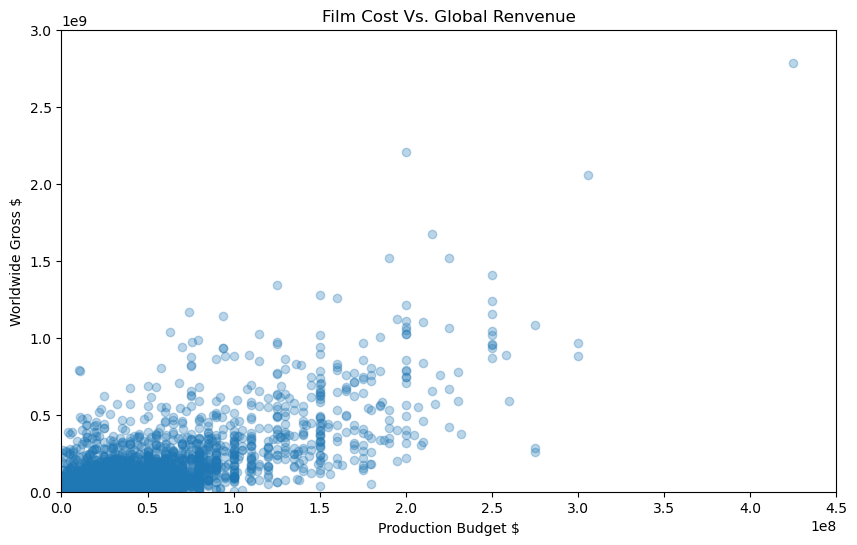

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y, alpha=0.3)
plt.title('Film Cost Vs. Global Renvenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [40]:
regression = LinearRegression()
regression.fit(X,Y)

LinearRegression()

Slope Coefficient & Intercept

In [41]:
regression.coef_
#Por cada dolar invertido en la película se tiene 3 dólares como retorno

array([[3.11150918]])

In [42]:
regression.intercept_
#Una película con cero de budget perderías 7 millones --> Es irreal porque si haces una película con mil dólares no perderías plata
#Tienes que aceptar que tu modelo es una interpretación irreal de la realidad. En los extremos no funciona bien el modelo. 

array([-7236192.72913958])

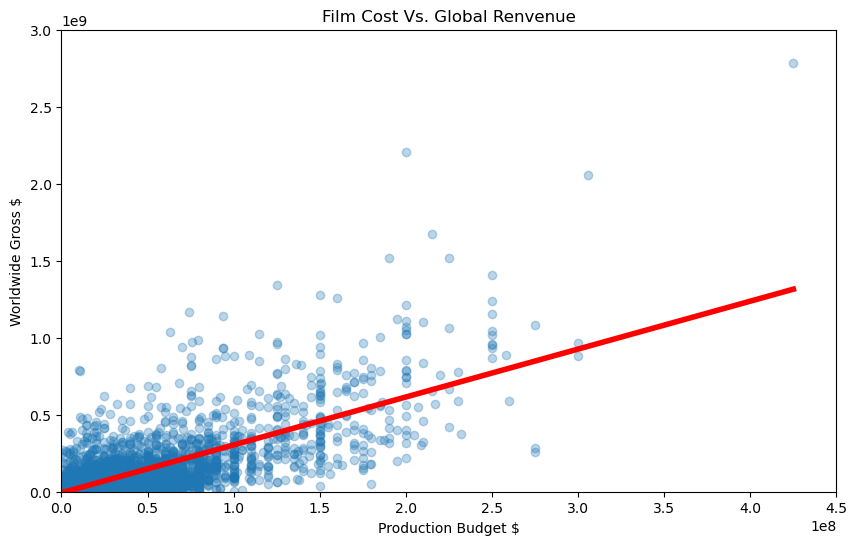

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y, alpha=0.3)
plt.plot(X,regression.predict(X),color='red',linewidth=4)

plt.title('Film Cost Vs. Global Renvenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

Regression Score or Goodness of Fit

In [46]:
regression.score(X,Y)
#El 55% de la variabilidad de los ingresos son por el budget

0.5496485356985729